# DA Bangsa - Homework - Module 4 - Session 3

You are working with a bike sharing rental company as a Data Analyst. The team  has asked you to prepare an annual report on the performance of their bike sharing services for 2020.

Please create a clean and short visualization report using python to answer the following questions:
- How was the daily trend of trips for the year 2020? Is there any popular day we see a spike?
- How are holidays having an effect on the overall trip count?
- Does weather have an affect on the trip share count ?
- Is there a significant difference in the ridership trend based on the membership type i.e. casual member or registered member?
- Are there popular days of the week which have higher or lower rideshare trips?

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib.dates import DateFormatter, MonthLocator
import dateparser

In [2]:
df = pd.read_csv("bike_sharing_daily_data.csv")

In [3]:
df

,date,season,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,trips
0,2020-01-01,Spring,0,6,0,Misty and Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2020-01-02,Spring,0,0,0,Misty and Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2020-01-03,Spring,0,1,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2020-01-04,Spring,0,2,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2020-01-05,Spring,0,3,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2021-12-27,Spring,0,4,1,Misty and Cloudy,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,2021-12-28,Spring,0,5,1,Misty and Cloudy,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,2021-12-29,Spring,0,6,0,Misty and Cloudy,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,2021-12-30,Spring,0,0,0,Clear/Partly Cloudy,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        731 non-null    datetime64[ns]
 1   season      731 non-null    object        
 2   holiday     731 non-null    int64         
 3   weekday     731 non-null    int64         
 4   workingday  731 non-null    int64         
 5   weather     731 non-null    object        
 6   temp        731 non-null    float64       
 7   atemp       731 non-null    float64       
 8   hum         731 non-null    float64       
 9   windspeed   731 non-null    float64       
 10  casual      731 non-null    int64         
 11  registered  731 non-null    int64         
 12  trips       731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(6), object(2)
memory usage: 74.4+ KB


In [116]:
# Change date column data type to datetime
df['date'] = df['date'].astype('datetime64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        731 non-null    datetime64[ns]
 1   season      731 non-null    object        
 2   holiday     731 non-null    int64         
 3   weekday     731 non-null    int64         
 4   workingday  731 non-null    int64         
 5   weather     731 non-null    object        
 6   temp        731 non-null    float64       
 7   atemp       731 non-null    float64       
 8   hum         731 non-null    float64       
 9   windspeed   731 non-null    float64       
 10  casual      731 non-null    int64         
 11  registered  731 non-null    int64         
 12  trips       731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(6), object(2)
memory usage: 74.4+ KB


## How was the daily trend of trips for the year 2020? Is there any popular day we see a spike?

In [27]:
# Select trips in 2020
df2020 = df[df['date'].dt.year == 2020]
df2020

,date,season,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,trips
0,2020-01-01,Spring,0,6,0,Misty and Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2020-01-02,Spring,0,0,0,Misty and Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2020-01-03,Spring,0,1,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2020-01-04,Spring,0,2,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2020-01-05,Spring,0,3,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2020-12-27,Spring,0,3,1,Clear/Partly Cloudy,0.299130,0.279974,0.503913,0.293961,255,2047,2302
362,2020-12-28,Spring,0,4,1,Clear/Partly Cloudy,0.248333,0.263892,0.574167,0.119412,254,2169,2423
363,2020-12-29,Spring,0,5,1,Clear/Partly Cloudy,0.311667,0.318812,0.636667,0.134337,491,2508,2999
364,2020-12-30,Spring,0,6,0,Clear/Partly Cloudy,0.410000,0.414121,0.615833,0.220154,665,1820,2485


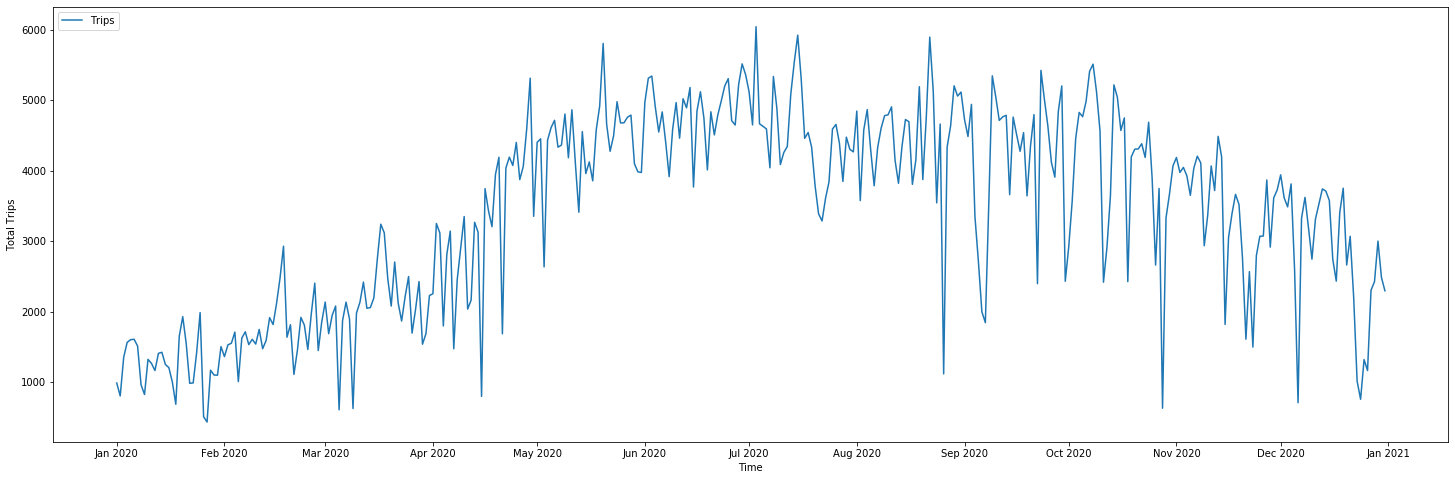

In [30]:
# Visualization
fig, ax = plt.subplots(figsize=(25, 8))

# Plot 
ax.plot(df2020['date'], df2020['trips'], color='tab:blue', label='Trips')

# X and Y axis labels
ax.set_xlabel('Time')
ax.set_ylabel('Total Trips')

# Set the axis label with interval of one month and show it in <Month name> <Year> format
ax.xaxis.set_major_locator(MonthLocator(interval = 1))
ax.xaxis.set_major_formatter(DateFormatter('%b %Y'))

# place the legend at upper left corner
ax.legend(loc='upper left');

__Explanation:__
    
As we see from the chart above there are spikes of number of trips during the period.    

## How are holidays having an effect on the overall trip count?


In [127]:
df.groupby(by=["holiday"])['trips'].mean()

holiday
0    4527.104225
1    3735.000000
Name: trips, dtype: float64

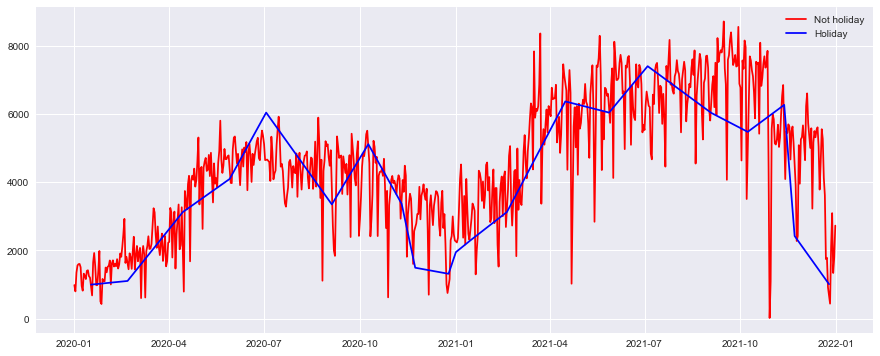

In [39]:
x1 = df['date'][df['holiday']==0]
y1 = df['trips'][df['holiday']==0]
x2 = df['date'][df['holiday']==1]
y2 = df['trips'][df['holiday']==1]

plt.style.use('seaborn')
plt.figure(figsize=(15,6))                                       # figure size
plt.plot(x1, y1, 'red', x2, y2, 'blue')                         # line color
# plt.title('Number of Passenger in January Yearly', size = 15)   
# plt.xlabel('Yearly')
# plt.ylabel('Number of Passengers')
plt.legend(['Not holiday','Holiday'])
plt.grid(True)
plt.show()

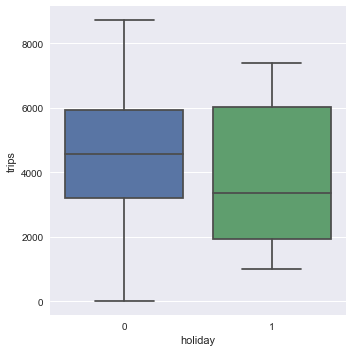

In [129]:
sns.catplot(x='holiday'
            , y='trips'
            , data=df
            , kind='box'
            , height=5
            )

__Explanation__:

Holiday (1) has larger data spread than Not Holiday (0) and in general the average of Holiday is lower than Not Holiday (1)

## Does weather have an affect on the trip share count ?

In [41]:
# Find out unique value of weather
df['weather'].unique()

array(['Misty and Cloudy', 'Clear/Partly Cloudy',
       'Rain/Snow/Thunderstorm'], dtype=object)

In [101]:
# Average of each weather value
print(df.groupby(by=["weather"])['trips'].mean())

weather
Clear/Partly Cloudy       4876.786177
Misty and Cloudy          4035.862348
Rain/Snow/Thunderstorm    1803.285714
Name: trips, dtype: float64


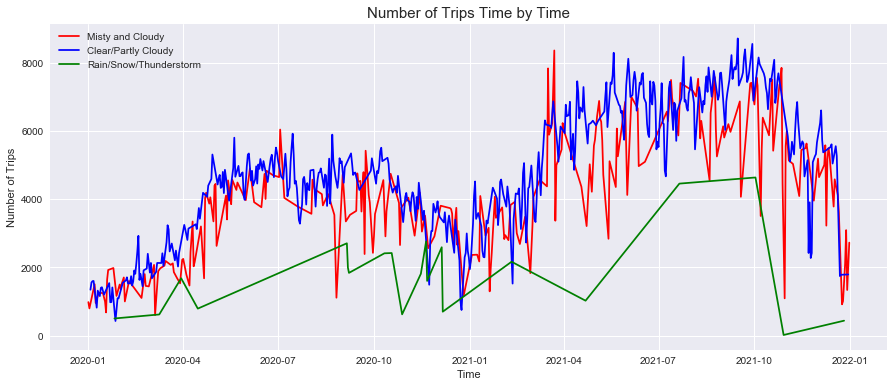

In [85]:
# Select the data
x1 = df['date'][df['weather']=='Misty and Cloudy']
y1 = df['trips'][df['weather']=='Misty and Cloudy']b
x2 = df['date'][df['weather']=='Clear/Partly Cloudy']
y2 = df['trips'][df['weather']=='Clear/Partly Cloudy']
x3 = df['date'][df['weather']=='Rain/Snow/Thunderstorm']
y3 = df['trips'][df['weather']=='Rain/Snow/Thunderstorm']

# Visualization
plt.style.use('seaborn')
plt.figure(figsize=(15,6))                                       # figure size
plt.plot(x1, y1, 'red', x2, y2, 'blue', x3, y3, 'green')         # line color
plt.title('Number of Trips Time by Time', size = 15)   
plt.xlabel('Time')
plt.ylabel('Number of Trips')
plt.legend(['Misty and Cloudy','Clear/Partly Cloudy','Rain/Snow/Thunderstorm'])
plt.grid(True)
plt.show()

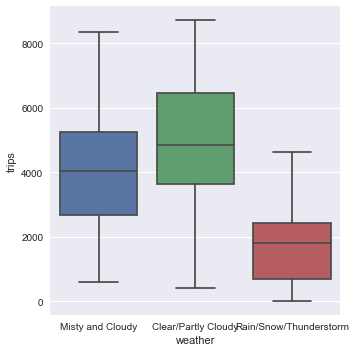

In [124]:
sns.catplot(x='weather'
            , y='trips'
            , data=df
            , kind='box'
            , height=5
            )

__Explanation__:

From the visualization and the mean vaue above, we can say that __the weather affects the numbers of trips, especially when it occurs the rain/snow/thunderstorm__. The rain/Snow/Thunderstorm weather has very low number trips compared to two other weather. This makes sense since in that condition, not many people do activities outside and the bike renters have bigger risk to hurt themselves.

## Is there a significant difference in the ridership trend based on the membership type i.e. casual member or registered member?

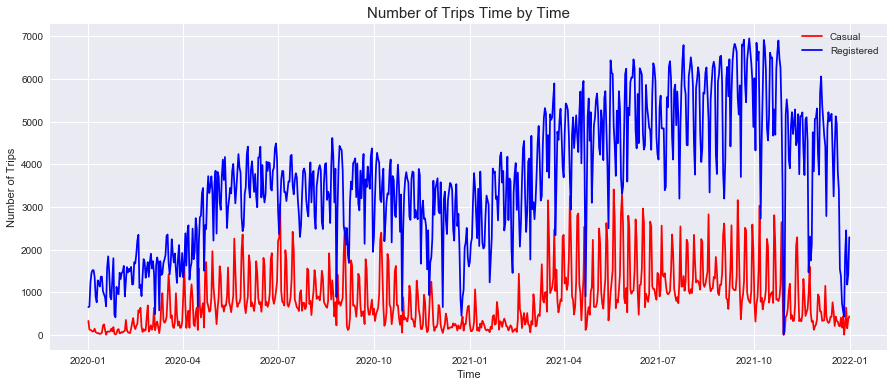

In [96]:
# Define the data
x1 = df['date']
y1 = df['casual']
x2 = df['date']
y2 = df['registered']

# Visualization
plt.style.use('seaborn')
plt.figure(figsize=(15,6))                      # figure size
plt.plot(x1, y1, 'red', x2, y2, 'blue')         # line color
plt.title('Number of Trips Time by Time', size = 15)   
plt.xlabel('Time')
plt.ylabel('Number of Trips')
plt.legend(['Casual','Registered'])
plt.grid(True)
plt.show()

__Explanation__:

There is a siginificant different between membership type. Registered member has higher total trips than the casual member.

## Are there popular days of the week which have higher or lower rideshare trips?

In [113]:
# Average of each weather value
df.groupby(by=["weekday"])['trips'].mean()

weekday
0    4228.828571
1    4338.123810
2    4510.663462
3    4548.538462
4    4667.259615
5    4690.288462
6    4550.542857
Name: trips, dtype: float64

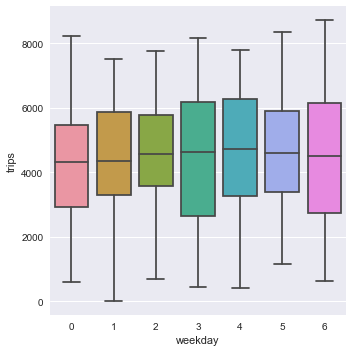

In [126]:
sns.catplot(x='weekday'
            , y='trips'
            , data=df
            , kind='box'
            , height=5
            )

__Explanation:__

Day 3 (Wednesday) and Day 6 (Saturday) have similar data spread/dispersion. The Q1 of those day are the lowest among others and the Q3 are nearly the highest among others.